In [371]:
#Q3
# Data Processing



In [392]:
%matplotlib notebook
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [373]:
df = pd.read_excel('toxicity.xlsx')

In [374]:
df.head(10000)

,Unnamed: 0,flirtation,identity_attack,insult,severe_toxicity,sexually_explicit,threat,label
0,0,0.593828,0.563516,0.849090,0.864632,0.777347,0.602494,Offensive
1,1,0.213193,0.407253,0.925010,0.856451,0.456983,0.592931,Offensive
2,2,0.474532,0.323574,0.710831,0.747318,0.933715,0.208848,Very offensive
3,3,0.503426,0.407557,0.796685,0.854638,0.955973,0.343336,Neutral
4,4,0.394807,0.170078,0.561849,0.766563,0.459300,0.223698,Profanity
...,...,...,...,...,...,...,...,...
9995,9995,0.336684,0.367809,0.907675,0.854638,0.652246,0.221739,Profanity
9996,9996,0.131690,0.751329,0.964347,0.705841,0.086667,0.146221,Profanity
9997,9997,0.389191,0.153244,0.682740,0.747318,0.412119,0.284202,Profanity
9998,9998,0.232913,0.894221,0.890876,0.837180,0.382602,0.202924,Extremely offensive


In [375]:
df.groupby(['label']).count()

,Unnamed: 0,flirtation,identity_attack,insult,severe_toxicity,sexually_explicit,threat
label,,,,,,,
Extremely offensive,426,426,426,426,426,426,426
Hate speech,86,86,86,86,86,86,86
Neutral,10582,10582,10582,10582,10582,10582,10582
Offensive,5966,5966,5966,5966,5966,5966,5966
Profanity,3430,3430,3430,3430,3430,3430,3430
Unknown,140,140,140,140,140,140,140
Very offensive,1138,1138,1138,1138,1138,1138,1138


In [376]:
df = df.replace(['Offensive', 'Very offensive', 'Extremely offensive','Profanity','Hate speech','Neutral'],[
    'Toxic','Toxic','Toxic','Toxic','Toxic','Non-Toxic'])

In [377]:
df.count()

Unnamed: 0           21768
flirtation           21768
identity_attack      21768
insult               21768
severe_toxicity      21768
sexually_explicit    21768
threat               21768
label                21768
dtype: int64

In [378]:
df.groupby(['label']).count()

,Unnamed: 0,flirtation,identity_attack,insult,severe_toxicity,sexually_explicit,threat
label,,,,,,,
Non-Toxic,10582,10582,10582,10582,10582,10582,10582
Toxic,11046,11046,11046,11046,11046,11046,11046
Unknown,140,140,140,140,140,140,140


In [379]:
df = df[df.label.isin(['Toxic','Non-Toxic'])]

In [380]:
df.groupby(['label']).count()

,Unnamed: 0,flirtation,identity_attack,insult,severe_toxicity,sexually_explicit,threat
label,,,,,,,
Non-Toxic,10582,10582,10582,10582,10582,10582,10582
Toxic,11046,11046,11046,11046,11046,11046,11046


In [381]:
# Creating Dependent 'Target' and Independent Variables 'Feature'

In [382]:
X_Independent = df.iloc[:,1:-1]

In [383]:
X_Independent.head()

,flirtation,identity_attack,insult,severe_toxicity,sexually_explicit,threat
0,0.593828,0.563516,0.849090,0.864632,0.777347,0.602494
1,0.213193,0.407253,0.925010,0.856451,0.456983,0.592931
2,0.474532,0.323574,0.710831,0.747318,0.933715,0.208848
3,0.503426,0.407557,0.796685,0.854638,0.955973,0.343336
4,0.394807,0.170078,0.561849,0.766563,0.459300,0.223698


In [384]:
Y_dependent = df.iloc[:,-1]

In [385]:
Y_dependent.head()

0        Toxic
1        Toxic
2        Toxic
3    Non-Toxic
4        Toxic
Name: label, dtype: object

In [386]:
# Spliting Data into Train and Test stage

X_train, X_test, y_train, y_test = train_test_split(X_Independent, Y_dependent, test_size = 0.2, random_state = 0)

In [387]:
X_train.count()

flirtation           17302
identity_attack      17302
insult               17302
severe_toxicity      17302
sexually_explicit    17302
threat               17302
dtype: int64

In [388]:
X_test.count()

flirtation           4326
identity_attack      4326
insult               4326
severe_toxicity      4326
sexually_explicit    4326
threat               4326
dtype: int64

In [389]:
# Data Normalisation on Training data via MinMax Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [390]:
# Grid Search for Kernel SVC

clf = SVC(kernel= 'rbf')
grid_values = {'gamma': [0.001, 0.1, 0.05, 0.1, 1, 10, 100], 'C':[0.1, 1,7, 15] }

In [391]:
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train_scaled, y_train)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 15, 'gamma': 100}
Grid best score (accuracy):  0.9815049277414895


In [334]:
# Data Normalisation on Testing Data MinMax Scaler
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [345]:
SVM_predicted = SVC(gamma = 100, C=15, probability = True).fit(X_train_scaled, y_train) 
SVM_predicted.score(X_test_scaled, y_test)

0.963245492371706

In [362]:
# SVM Model Evaluation

y_score_SVM = SVC(gamma = 100, C=15,probability = True ).fit(X_train_scaled, y_train).decision_function(X_test_scaled)
y_test = y_test.replace(['Toxic','Non-Toxic'],[1,0])
fpr,tpr, _ = roc_curve(y_test,y_score_SVM)
roc_auc_SVM = auc(fpr,tpr)

<IPython.core.display.Javascript object>


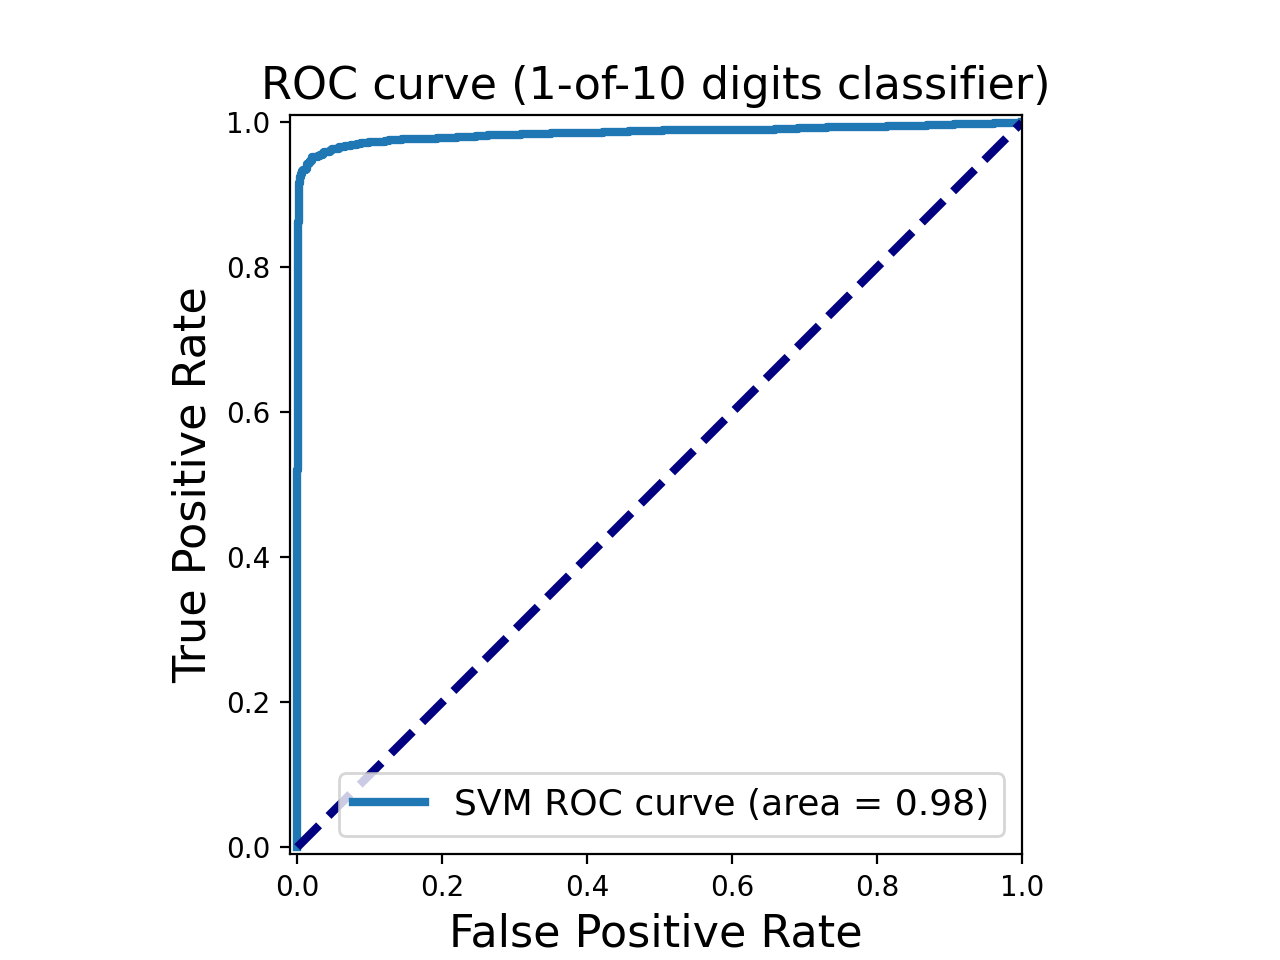

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


In [369]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='SVM ROC curve (area = {:0.2f})'.format(roc_auc_SVM))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


In [397]:
y_score_SVM


array([-0.8759622 ,  1.13521295,  1.20321668, ..., -0.01572147,
       -1.03540735,  1.17581449])

array([-0.8759622 ,  1.13521295,  1.20321668, ..., -0.01572147,
       -1.03540735,  1.17581449])